In [43]:
import pandas as pd

In [44]:
df = pd.read_csv("figuresdf.tsv", sep="\t")

In [45]:
df.sample(10)

,Measure,Beat,Offset,4_3,4_2,4_1,3_2,3_1,2_1,Composer,Title,figures,figures_combined
891,65,2.5,523.0,5,2,8,5,4,7,Roland de Lassus,Missa Doulce memoire: Credo,528,"['528', '538', '183', '000', '005', '006', '00..."
265,24,1.0,192.0,8,3,5,3,5,3,Roland de Lassus,Missa Doulce memoire: Kyrie,835,"['835', '503', '583', '835', '724', '683', '57..."
1400,52,1.0,424.0,8,5,3,4,3,6,Roland de Lassus,Missa Doulce memoire: Sanctus,853,"['853', '854', '835', '735', '584', '583', '15..."
632,60,1.0,508.0,5,8,3,4,6,3,Roland de Lassus,Missa Doulce memoire: Gloria,583,"['583', '835', '358', '853', '358', '583', '83..."
665,76,1.0,668.0,0,0,0,5,8,4,Roland de Lassus,Missa Doulce memoire: Gloria,58,"['058', '048', '035', '025', '853', '854', '85..."
195,6,4.5,47.0,6,2,4,4,6,3,Roland de Lassus,Missa Doulce memoire: Kyrie,624,"['624', '835', '583', '835', '735', '583', '03..."
1138,136,3.0,1132.0,5,8,3,4,6,3,Roland de Lassus,Missa Doulce memoire: Credo,583,"['583', '835', '583', '358', '136', '358', '58..."
100,28,3.0,224.0,8,3,5,3,5,3,Pierre Sandrin,Doulce memoire,835,"['835', '825', '385', '375', '853', '852', '83..."
659,74,1.0,652.0,3,6,0,4,0,0,Roland de Lassus,Missa Doulce memoire: Gloria,360,"['360', '580', '535', '036', '035', '036', '05..."
653,71,1.0,628.0,5,8,3,4,6,3,Roland de Lassus,Missa Doulce memoire: Gloria,583,"['583', '835', '358', '368', '358', '362', '36..."


In [46]:
for name, group in df.groupby(["Composer", "Title"]):
    print(name)
    # print(group[["4_3", "4_2", "4_1"]])

('Pierre Sandrin', 'Doulce memoire')
('Roland de Lassus', 'Missa Doulce memoire: Agnus Dei')
('Roland de Lassus', 'Missa Doulce memoire: Credo')
('Roland de Lassus', 'Missa Doulce memoire: Gloria')
('Roland de Lassus', 'Missa Doulce memoire: Kyrie')
('Roland de Lassus', 'Missa Doulce memoire: Sanctus')


In [47]:
import matplotlib.pyplot as plt
import numpy as np

In [48]:
def plot_axis(data, name, i=1, fig=None):
    if fig is None:
        fig = plt.gcf()
        
    ax = fig.add_subplot(2,3,i+1, projection="3d")
    ax.set_title(name[0] + "\n" + name[1])
    c = "teal" if i == 0 else "black"
    ax.plot(data[:,0], data[:,1], data[:,2], lw=1, alpha=.5, marker=".", c=c)
    ax.set_xlabel("B-T")
    ax.set_ylabel("B-A")
    ax.set_zlabel("B-C")
    
def centroidnp(arr):
    length = arr.shape[0]
    sum_x = np.sum(arr[:, 0])
    sum_y = np.sum(arr[:, 1])
    sum_z = np.sum(arr[:, 2])
    return sum_x/length, sum_y/length, sum_z/length

<IPython.core.display.Javascript object>


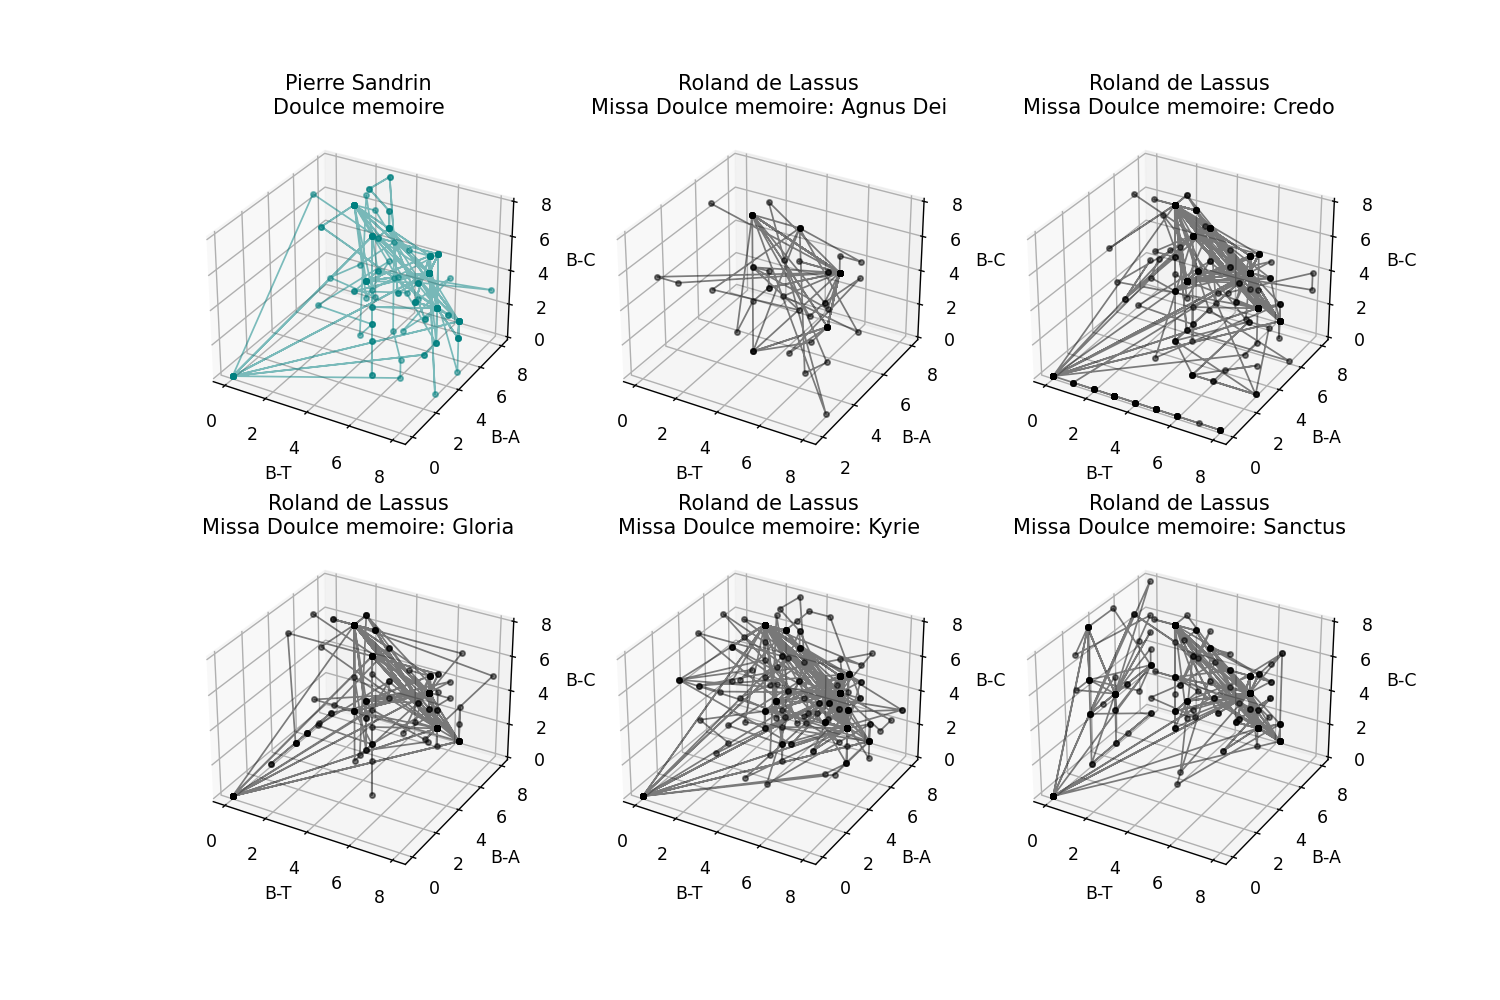

In [49]:
datas = []
centroids = []

fig = plt.figure(figsize=(12,8))

for i, (name, group) in enumerate(df.groupby(["Composer", "Title"])):
    data = group[["4_3", "4_2", "4_1"]].values
    datas.append(data)
    centroids.append(centroidnp(data))
    plot_axis(data, name, i=i, fig=fig)
plt.show()

In [27]:
centroids

[(5.005847953216374, 5.023391812865497, 4.157894736842105),
 (4.8493150684931505, 5.616438356164384, 4.2465753424657535),
 (3.7995991983967934, 3.6432865731462925, 3.0280561122244487),
 (4.475806451612903, 4.967741935483871, 4.391129032258065),
 (4.69964664310954, 5.053003533568905, 4.431095406360424),
 (3.153558052434457, 4.5543071161048685, 3.6816479400749063)]

<IPython.core.display.Javascript object>


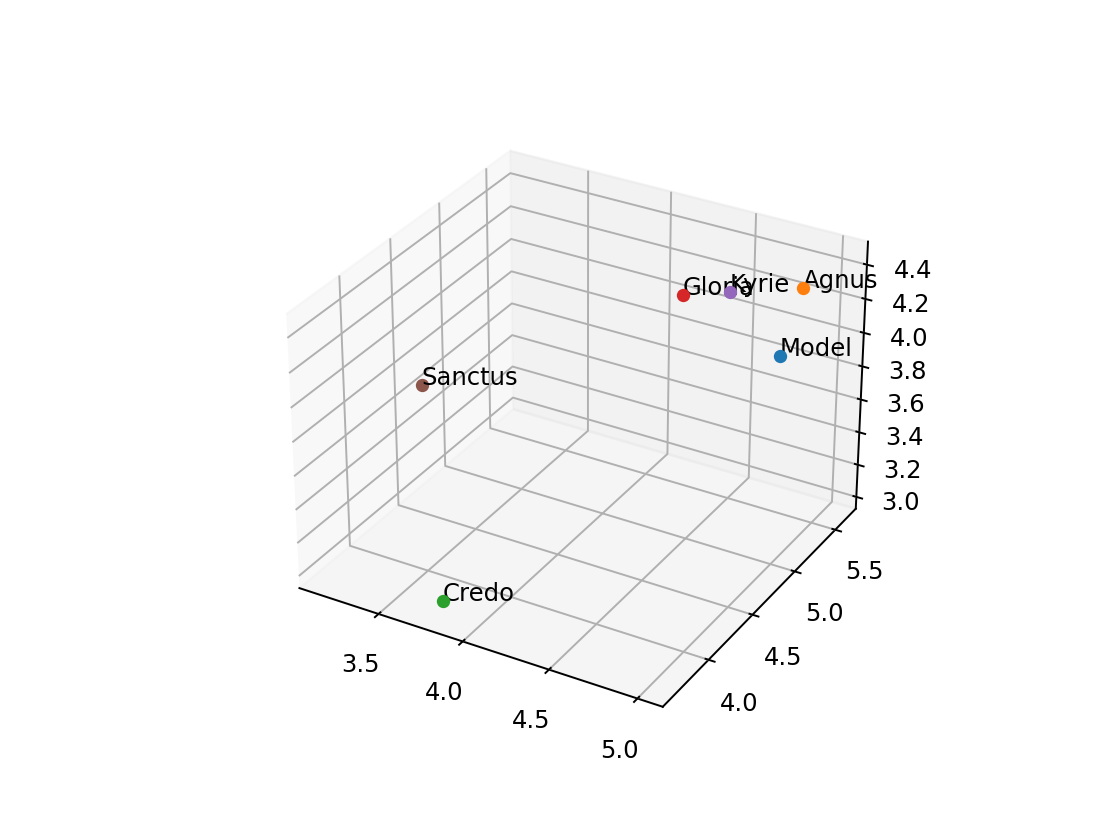

In [41]:
names = [
    "Model",
    "Agnus",
    "Credo",
    "Gloria",
    "Kyrie",
    "Sanctus"
]

fig = plt.figure()
ax = fig.add_subplot(projection="3d")
for i, c in zip(names, centroids):
    ax.scatter(c[0], c[1], c[2])
    ax.text(c[0], c[1], c[2], i)
plt.show()

In [10]:
figures = pd.read_csv("figures.tsv", sep="\t")

In [11]:
pairs = [ (first, second) for first, second in zip(df.figures, df.figures[1:]) ]
pairs[:3]

[(583, 358), (358, 583), (583, 358)]

In [12]:
def vec(fig):
    strings_tup = tuple(str(fig))
    return tuple(map(int, strings_tup))

In [13]:
pairs = [ (vec(p[0]), vec(p[1])) for p in pairs ]
pairs[:3]

[((5, 8, 3), (3, 5, 8)), ((3, 5, 8), (5, 8, 3)), ((5, 8, 3), (3, 5, 8))]

In [14]:
from collections import Counter
pairs_counts = Counter(pairs)

In [15]:
len(pairs_counts)

580

In [16]:
pairs_counts.most_common(2)

[(((5, 8, 3), (8, 3, 5)), 70), (((3, 5, 8), (5, 8, 3)), 69)]

In [17]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection as Poly3d

<IPython.core.display.Javascript object>


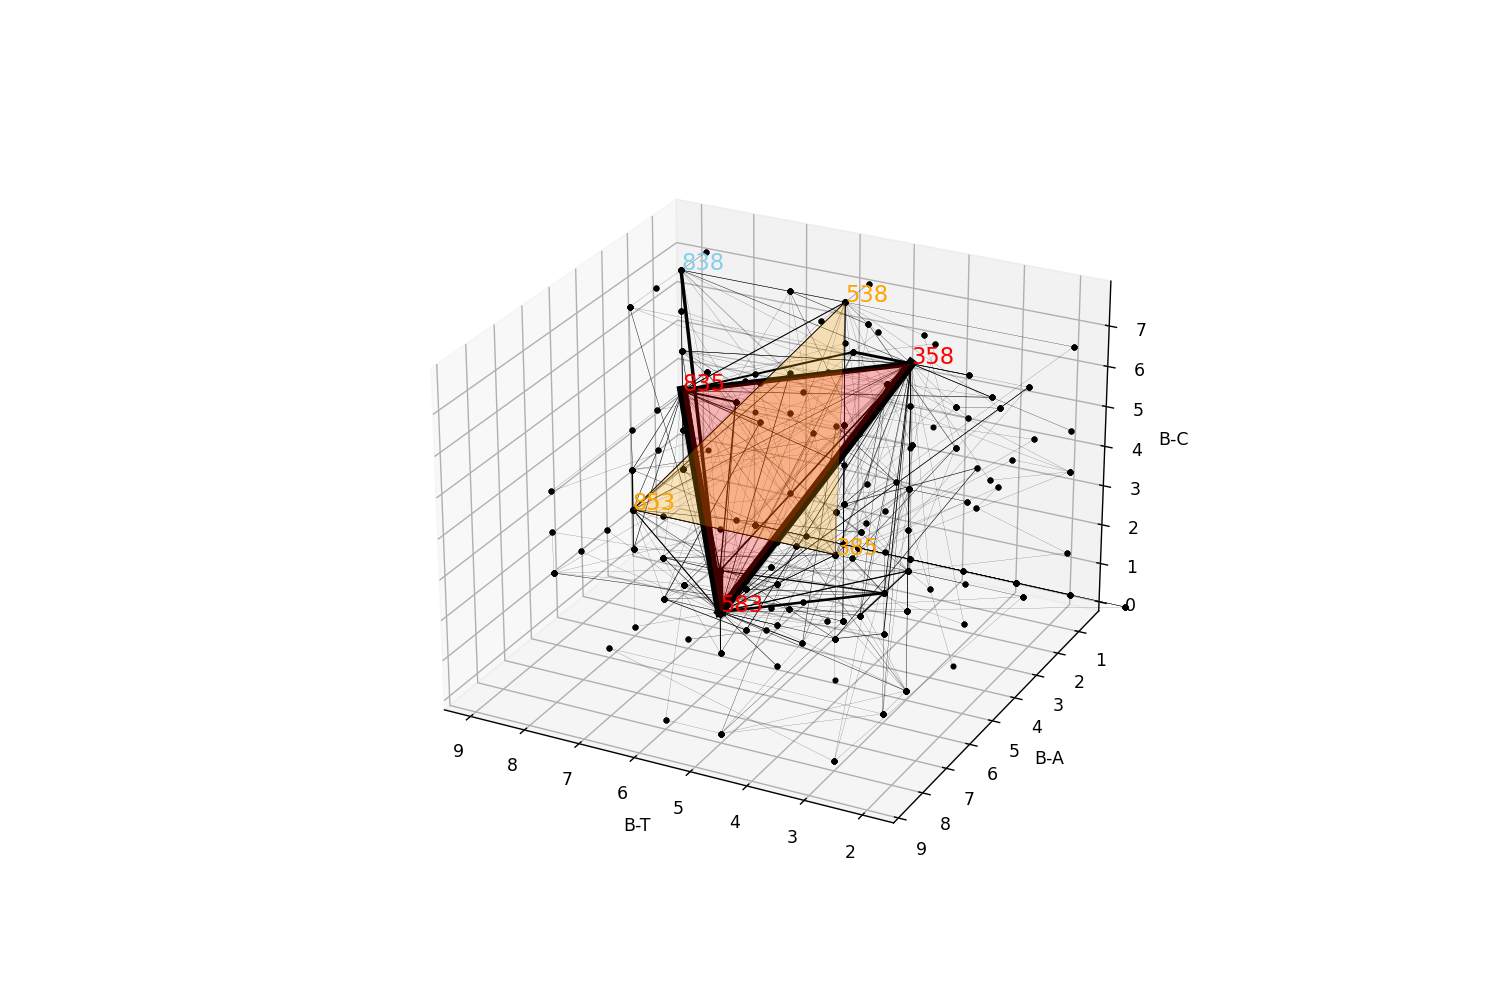

In [18]:
%matplotlib notebook

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(projection="3d")
ax.view_init(azim=60)

for p, count in pairs_counts.most_common():
    try: 
        ax.plot(
            (p[0][0], p[1][0]), # x
            (p[0][1], p[1][1]), # y
            (p[0][2], p[1][2]), # z
            c="k", alpha=1, lw=count/12, marker=".", markersize=5)
    except: # fails for 2-tuples
        pass
    
# most common voicings
ax.text(8,3,5, "835", c="red", fontsize=13)
ax.text(3,5,8, "358", c="red", fontsize=13)
ax.text(5,8,3, "583", c="red", fontsize=13)

vertices = np.array([
    [8,3,5],
    [3,5,8],
    [5,8,3]])
top_triangle = Poly3d([vertices])
top_triangle.set_color("red")
top_triangle.set_edgecolor(None)
top_triangle.set_alpha(.25)
ax.add_collection3d(top_triangle)

# less common voicings
ax.text(5,3,8, "538", c="orange", fontsize=13)
ax.text(3,8,5, "385", c="orange", fontsize=13)
ax.text(8,5,3, "853", c="orange", fontsize=13)

vertices = np.array([
    [5,3,8],
    [3,8,5],
    [8,5,3]])
top_triangle = Poly3d([vertices])
top_triangle.set_color("orange")
top_triangle.set_edgecolor(None)
top_triangle.set_alpha(.25)
ax.add_collection3d(top_triangle)

# an interesting outlier? 838-583 very common!
ax.text(8,3,8, "838", c="skyblue", fontsize=13)

ax.set_xlabel("B-T")
ax.set_ylabel("B-A")
ax.set_zlabel("B-C")

plt.show()

In [200]:
[np.random.rand(3,3)]

[array([[0.48993614, 0.35994656, 0.91807284],
        [0.45210917, 0.63167453, 0.45454966],
        [0.02879418, 0.58563631, 0.13863007]])]